## Import required library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

## Read dataset

In [3]:
dataset = pd.read_csv(r"C:\Users\DEVIL SK\Downloads\spam.csv",encoding='latin-1')

In [4]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data pre-processing

In [5]:
ps=PorterStemmer()

In [6]:
data=[]
for i in range(0,5572):
  v2=dataset["v2"][i]
  v2=v2.lower()
  v2=re.sub('[^a-z]'," ",v2)
  v2=v2.split()
  v2=[ps.stem(word) for word in v2 if not word in set(stopwords.words('english'))]
  v2=' '.join(v2)
  data.append(v2)

In [7]:
data

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [8]:
cv=CountVectorizer(max_features=1000)

In [9]:
x=cv.fit_transform(data).toarray()

In [10]:
type(x)

numpy.ndarray

In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
x.shape

(5572, 1000)

In [13]:
x.ndim

2

In [14]:
x = np.reshape(x,(5572,1000,1))

In [15]:
x.ndim

3

In [16]:
x.shape

(5572, 1000, 1)

In [17]:
y=cv.fit_transform(data).toarray()

In [18]:
type(y)

numpy.ndarray

In [19]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
y.shape

(5572, 1000)

In [21]:
y.ndim

2

In [22]:
y=np.reshape(y,(5572,1000,1))

In [23]:
y.ndim

3

In [24]:
y.shape

(5572, 1000, 1)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train.shape

(4457, 1000, 1)

In [27]:
y_train.shape

(4457, 1000, 1)

## Create Model

In [28]:
model=Sequential()

## Add LSTM Layers, Dense-(Hidden Layers), Output)

In [29]:
model.add(LSTM(units=5,return_sequences=True,input_shape=(1000,1)))

In [30]:
model.add(Dropout(0.2))

In [31]:
model.add(LSTM(units=3,return_sequences=True))

In [32]:
model.add(Dropout(0.2))

In [33]:
model.add(LSTM(units=5))

In [34]:
model.add(Dense(units=1))

## Compile the Model

In [35]:
model.compile(optimizer="adam",loss="mean_squared_error")

## Fit the Model

In [36]:
tr = model.fit(x_train,y_train,epochs=15,batch_size=32)

Epoch 1/15
140/140 [==============================] - 289s 2s/step - loss: 0.0077
Epoch 2/15
140/140 [==============================] - 264s 2s/step - loss: 0.0077
Epoch 3/15
140/140 [==============================] - 265s 2s/step - loss: 0.0077
Epoch 4/15
140/140 [==============================] - 266s 2s/step - loss: 0.0077
Epoch 5/15
140/140 [==============================] - 262s 2s/step - loss: 0.0077
Epoch 6/15
140/140 [==============================] - 265s 2s/step - loss: 0.0077
Epoch 7/15
140/140 [==============================] - 270s 2s/step - loss: 0.0077
Epoch 8/15
140/140 [==============================] - 264s 2s/step - loss: 0.0077
Epoch 9/15
140/140 [==============================] - 272s 2s/step - loss: 0.0077
Epoch 10/15
140/140 [==============================] - 267s 2s/step - loss: 0.0077
Epoch 11/15
140/140 [==============================] - 272s 2s/step - loss: 0.0077
Epoch 12/15
140/140 [==============================] - 274s 2s/step - loss: 0.0077
Epoch 13/15
1

In [37]:
tr.history

{'loss': [0.007742887828499079,
  0.007739383261650801,
  0.007738045416772366,
  0.007737926207482815,
  0.007737921085208654,
  0.0077376295812428,
  0.007740024942904711,
  0.007726644165813923,
  0.007723986636847258,
  0.007722601760178804,
  0.007722671143710613,
  0.007723095361143351,
  0.007721906527876854,
  0.007720984984189272,
  0.007721309084445238]}

In [38]:
loss = tr.history["loss"]

In [39]:
epochs = list(range(1,16))

Text(0, 0.5, 'loss')

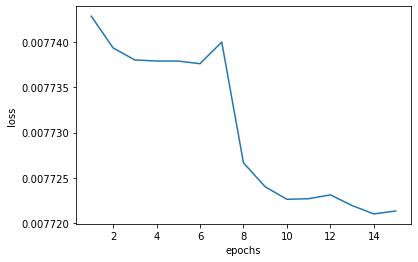

In [40]:
plt.plot(epochs,loss)
plt.xlabel("epochs")
plt.ylabel("loss")

## Save The Model

In [41]:
model.save('Assignment_sms_classifier.h5')

## Test The Model

In [42]:
ypred = model.predict(x_test)

35/35 [==============================] - 15s 317ms/step


In [43]:
ypred>0.0

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])